In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%matplotlib widget  

#plt.style.use('seaborn-whitegrid')
#plt.style.use("seaborn-v0_8-whitegrid")
#plt.style.use("seaborn-v0_8")
plt.style.use("seaborn-v0_8-whitegrid")

In [8]:
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

In [ ]:
df.head()

In [ ]:
df.tail()

### Poistetaan turhat sarakkeet

In [ ]:

df=df.drop(columns= ['number', 'healtcare', 'holidayCabin', 'gym', 'muscleCare'], axis= 1)
df.head()

### Katsotaan onko tyhjiä arvoja, ja minkä verran niitä on jos niitä on

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

### sat_management on tyytyväisyys johtoon/hallintoon

## Tarkastellaan, kuinka tyytyväisiä vastaajat ovat johtamiseen olleet

In [64]:
df1=pd.crosstab(df['sat_management'], 'Count')
df1['%'] = df1['Count'] / df1['Count'].sum() * 100
df1.index=['very unsatisfied','unsatisfied','can not say','satisfied','very satisfied']
df1.columns.name='sat_management'
df1


sat_management,Count,%
very unsatisfied,7,8.536585
unsatisfied,16,19.512195
can not say,30,36.585366
satisfied,23,28.048780
very satisfied,6,7.317073


<Axes: >

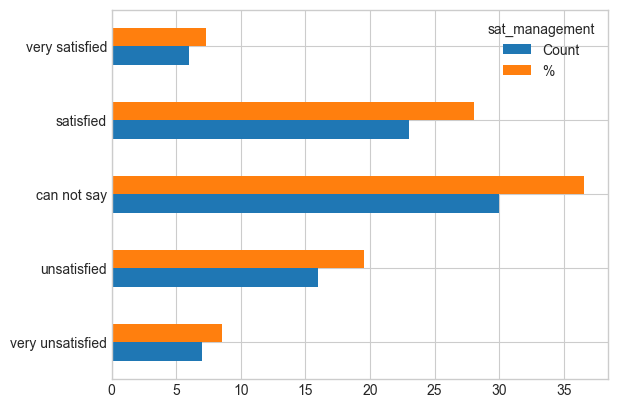

In [65]:
df1.plot.barh()

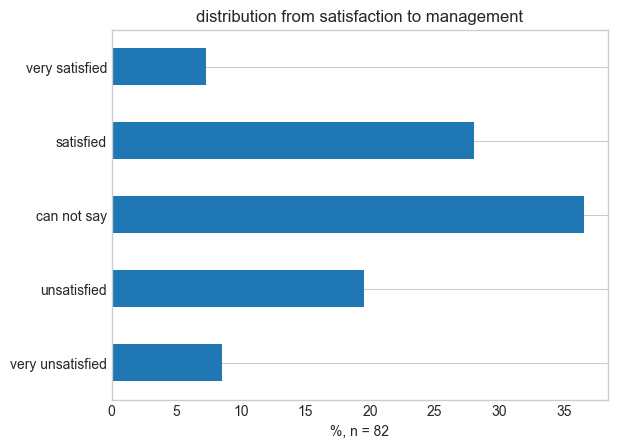

In [67]:
df1['%'].plot.barh(zorder = 2, legend= False)

plt.title('distribution from satisfaction to management')

plt.xlabel('%, n = ' + str(df1['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)


## Vertaillaan, miten miehet ja naiset ovat johtamisen tyytyväisyyteen vastanneet

In [62]:
df2 = pd.crosstab(df['sat_management'], df['gender'], normalize = 'columns') * 100
df2.index = ['very unsatisfied','unsatisfied','can not say','satisfied','very satisfied']
df2.columns = ['woman', 'man']
df2

,woman,man
very unsatisfied,11.111111,0.000000
unsatisfied,23.809524,5.263158
can not say,36.507937,36.842105
satisfied,23.809524,42.105263
very satisfied,4.761905,15.789474


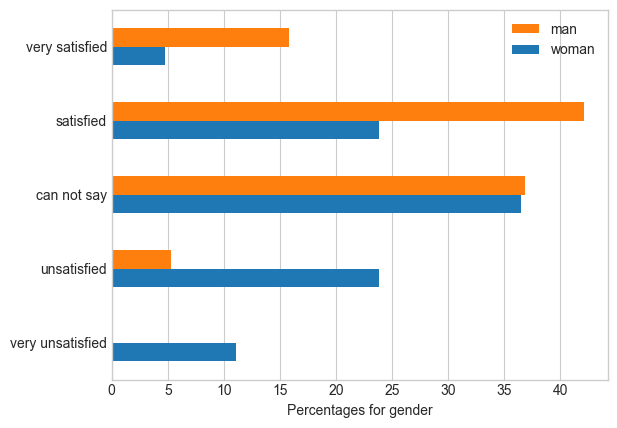

In [58]:
df2.plot.barh(legend = 'reverse')

plt.xlabel('Percentages for gender')

plt.grid(axis = 'y')

#### jaotellan palkkatasot 5 eri kaetgoriaan: 1500-2000, 2000-2500, 2500-3000, 3000-3600, 3600-7000

Text(0.5, 0, 'kuukasipalkka n=82')

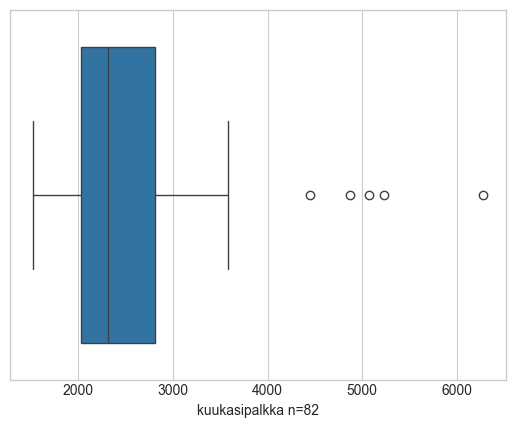

In [79]:
ax3 = sns.boxplot(x = df['salary'])

ax3.set_xlabel('kuukausipalkka n=' + str(df['salary'].count()))

In [82]:
df.nlargest(n = 10, columns = 'salary')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
32,1,59,2,3.0,15.0,6278,4,4.0,5,4,4
16,1,26,1,4.0,2.0,5225,5,5.0,5,4,5
66,1,37,2,4.0,8.0,5069,3,4.0,3,2,2
21,1,47,2,3.0,17.0,4874,2,4.0,3,2,4
23,1,36,1,3.0,7.0,4446,3,4.0,3,4,5
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
13,1,58,2,3.0,21.0,3587,4,5.0,4,1,3
22,1,44,2,1.0,27.0,3510,4,4.0,4,4,4
68,1,28,2,2.0,1.0,3510,4,5.0,3,1,4
71,1,46,2,2.0,23.0,3470,3,5.0,5,3,4


In [83]:
df.nsmallest(n = 10, columns = 'salary')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
25,1,26,1,2.0,3.0,1521,2,4.0,2,1,3
35,1,31,2,3.0,0.0,1559,2,4.0,3,1,3
53,1,25,1,2.0,1.0,1559,2,4.0,3,1,2
75,1,37,1,2.0,15.0,1598,1,5.0,1,1,1
77,1,22,1,3.0,0.0,1598,4,4.0,4,3,4
78,1,33,1,1.0,2.0,1638,1,3.0,2,1,2
63,2,44,1,2.0,1.0,1715,4,4.0,3,2,3
46,2,22,1,3.0,21.0,1872,3,3.0,4,1,3
61,1,40,2,1.0,0.0,1872,2,3.0,1,2,3
62,2,51,2,2.0,10.0,1872,4,3.0,2,2,3


In [111]:
bins = [1500,2000,2500,3000,3500,7000]

In [112]:
df['Kuukausipalkka_luokat'] = pd.cut(df['salary'], bins = bins)
df

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,Kuukausipalkka_luokat
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,"(3500, 7000]"
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,"(2500, 3000]"
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,"(1500, 2000]"
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,"(2000, 2500]"
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,"(2000, 2500]"
...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,"(1500, 2000]"
78,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,"(1500, 2000]"
79,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,"(2500, 3000]"
80,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,"(2500, 3000]"


## Vertaillaan, kuin palkkataso vaikuttaa tyytyväisyyteen

In [113]:
df3 = pd.crosstab(df['sat_management'], df['Kuukausipalkka_luokat'], normalize = 'columns') * 100
df3.index = ['very unsatisfied','unsatisfied','can not say','satisfied','very satisfied']

df3

Kuukausipalkka_luokat,"(1500, 2000]","(2000, 2500]","(2500, 3000]","(3000, 3500]","(3500, 7000]"
very unsatisfied,21.052632,7.142857,4.545455,0.0,0.000000
unsatisfied,26.315789,14.285714,22.727273,25.0,11.111111
can not say,21.052632,42.857143,40.909091,50.0,33.333333
satisfied,31.578947,21.428571,27.272727,25.0,44.444444
very satisfied,0.000000,14.285714,4.545455,0.0,11.111111


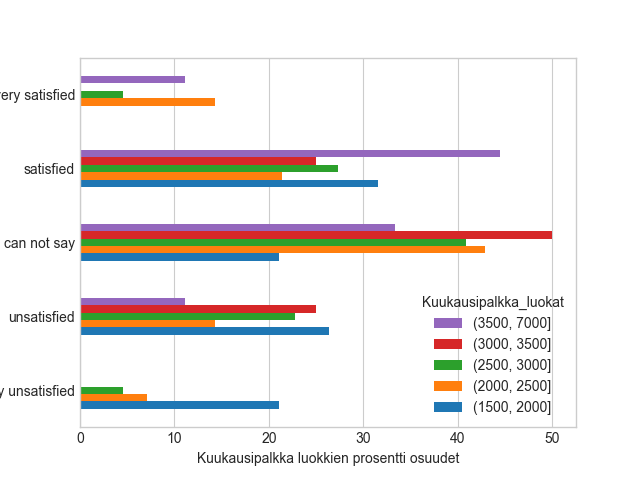

In [116]:
df3.plot.barh(legend = 'reverse')

plt.xlabel('Kuukausipalkka luokkien prosentti osuudet')

plt.grid(axis = 'y')

In [118]:


#df3.plot(kind='bar', align='edge', width=1.0)
#df.plot()



#return moving_averages
    